In [58]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows',500)


![CRISP_DM](Crisp_DM_Tasks.png)

# Data Preparation

* focus is always to understand the final data structure

* support each step by visual analytics

# Johns Hopkins GITHUB csv data

In [59]:
data_path='C:/ProgramData/Anaconda3/eps_covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [60]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20',
       '9/11/20', '9/12/20', '9/13/20'],
      dtype='object', length=236)

In [61]:
time_idx=pd_raw.columns[4:]

In [62]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [63]:
len(pd_raw['Country/Region'].unique())

188

In [64]:
pd_raw['Country/Region'].head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object

In [65]:
pd_raw[pd_raw['Country/Region']=='Australia'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [66]:
country_list=['Albania',
              'India',
              'Italy',
              'Germany',
              'US'
             ]

In [67]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [68]:
df_plot.head()

,date,Albania,India,Italy,Germany,US
0,1/22/20,0,0,0,0,1
1,1/23/20,0,0,0,0,1
2,1/24/20,0,0,0,0,2
3,1/25/20,0,0,0,0,2
4,1/26/20,0,0,0,0,5


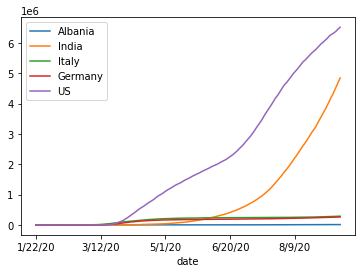

In [69]:
df_plot.set_index('date').plot()

# Data Type Date

In [70]:
df_plot.head()

,date,Albania,India,Italy,Germany,US
0,1/22/20,0,0,0,0,1
1,1/23/20,0,0,0,0,1
2,1/24/20,0,0,0,0,2
3,1/25/20,0,0,0,0,2
4,1/26/20,0,0,0,0,5


In [71]:
# from datetime import datetime

In [72]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [73]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [74]:
df_plot.tail()

,date,Albania,India,Italy,Germany,US
231,2020-09-09,10704,4465863,281583,256433,6360212
232,2020-09-10,10860,4562414,283180,258149,6396100
233,2020-09-11,11021,4659984,284796,259735,6443652
234,2020-09-12,11185,4754356,286297,260817,6485123
235,2020-09-13,11353,4846427,287753,261737,6519573


In [75]:
df_plot.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_small_flat_table.csv', sep=';',index=False)

# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:
* It must contain a unique value for each row of data.
* It cannot contain null values.

In [76]:
data_path='C:/ProgramData/Anaconda3/eps_covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [77]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                                   'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [78]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,no,Albania,0,0,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,no,Algeria,0,0,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,no,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [79]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [80]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [81]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [82]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [83]:
#df_plot.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_relational_confirmed.csv',sep=';')

In [84]:
pd_relational_model.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,Anguilla,United Kingdom,0.0
2,2020-01-22,Anhui,China,1.0
3,2020-01-22,Aruba,Netherlands,0.0
4,2020-01-22,Australian Capital Territory,Australia,0.0


In [85]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_relational_confirmed.csv',sep=';',index=False)


In [86]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
61698 2020-09-09    no      US    6360212
61964 2020-09-10    no      US    6396100
62230 2020-09-11    no      US    6443652
62496 2020-09-12    no      US    6485123
62762 2020-09-13    no      US    6519573


# Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file


In [87]:
data_path='C:/ProgramData/Anaconda3/eps_covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,616,616,616,617,617,618,618,618,620,622
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,545,550,555,557,562,564,566,574,576,578
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121


In [88]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [89]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


# update the large relational file

In [90]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [91]:
pd_relational_model_all.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,Anguilla,United Kingdom,0
2,2020-01-22,Anhui,China,1
3,2020-01-22,Aruba,Netherlands,0
4,2020-01-22,Australian Capital Territory,Australia,0


In [92]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [93]:
pd_relational_model_all.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [94]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'].head())

            date    state country  confirmed
62540 2020-01-22  Alabama      US          0
62541 2020-01-22  Alabama      US          0
62542 2020-01-22  Alabama      US          0
62543 2020-01-22  Alabama      US          0
62544 2020-01-22  Alabama      US          0


### cross check on full sum US data

In [95]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [96]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum().head()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5


# Group-by apply

In [97]:
pd_JH_data=pd.read_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


In [98]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-07-30')]

In [99]:
test_data.head()

,date,state,country,confirmed
50848,2020-07-31,no,Germany,210399
50889,2020-07-31,no,US,4562107
51113,2020-08-01,no,Germany,211005
51153,2020-08-01,no,US,4620592
51381,2020-08-02,no,Germany,211220


In [100]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-09-13,no,261737
US,2020-09-13,no,6519573


In [101]:
# %load C:/ProgramData/Anaconda3/eps_covid19/src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate
        Parameters:
        ----------
        in_array : pandas.series
        Returns:
        ----------
        Doubling rate: double
    '''

    #print(in_array)
    #print(type)
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    #y = np.array(in_array['confirmed'])
    #X = np.arange(len(y)).reshape(-1, 1)
    
    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))


the test slope is: [2.]


In [102]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-13     261737
      US      2020-09-13    6519573

In [103]:
# this command will only work when adapting the get_doubling_time_via_regression function

#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [104]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [105]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').head()

state  country       
no     Germany  50848           NaN
                51113           NaN
                51381    513.701989
                51647    382.360458
                51911    263.747512
Name: confirmed, dtype: float64

In [106]:
test_data.head()

,date,state,country,confirmed
50848,2020-07-31,no,Germany,210399
50889,2020-07-31,no,US,4562107
51113,2020-08-01,no,Germany,211005
51153,2020-08-01,no,US,4620592
51381,2020-08-02,no,Germany,211220


In [107]:
#pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

In [108]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [109]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                            'level_2':'index'})
pd_DR_result.head()

,state,country,index,doubling_rate
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN


In [110]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [111]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index', 'doubling_rate']],on=['index'],how='left')

In [112]:
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,Alberta,Canada,0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN
2,2,2020-01-22,no,Kosovo,0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN
